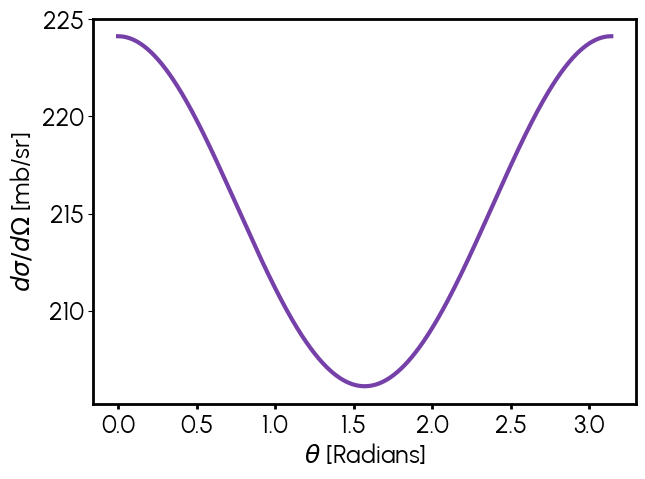

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager
from matplotlib import pyplot as plt
from pyfonts import load_google_font
from matplotlib.font_manager import FontProperties
from pypalettes import load_cmap
import os 

"""
Here we load fonts and colors, to set up the formatting of our plots. 
"""

for fontpath in font_manager.findSystemFonts(fontpaths=None, fontext="ttf"):
    if 'Urbanist'.lower() in fontpath.lower():
        print(fontpath)

#Change this to your path
personal_path = "/home/hoelsczj/Library/static/"

#Get normal font and store it in `urbanist-Light`
font_path = personal_path + "Urbanist-Regular.ttf"
font_manager.fontManager.addfont(font_path)
urbanist= FontProperties(fname=font_path)

#Get bold font and store it in `urbanist_bold`
font_path = personal_path + "Urbanist-Bold.ttf"
font_manager.fontManager.addfont(font_path)
urbanist_bold = FontProperties(fname=font_path)

plt.rcParams["font.family"] = "sans-serif"
plt.rcParams['font.sans-serif'] = urbanist.get_name()
SMALL_SIZE = 18
MEDIUM_SIZE = 18 #Sets font size, we use 18 here.
BIGGER_SIZE = 18

plt.rc('font', family="urbanist", size=SMALL_SIZE) #Controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     #Fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE, lw=2)  #Fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    #Fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    #Fontsize of the tick labels
plt.rcParams['xtick.minor.width']=2   
plt.rcParams['xtick.major.width']=2 
plt.rc('legend', fontsize=SMALL_SIZE)    #Legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  #Fontsize of the figure title

cmap = load_cmap("PurpleGreens")

"""
Here we compute and plot the differential cross section. 
"""

#Parameters (these can be changed)
m_alpha = 1  #Heavy vector mass in GeV 
m_h = 0.001   #MeV mediator mass (in units of GeV)
g = 0.0175 #Coupling constant 
v_rel = 200/299792.458 #200 km/sec in units of c, relative velocity 

v_cm = v_rel/2 #Center of mass frame, good approximation for v << c. 
#v_rel is the relative velocity, v_cm is in the center of mass frame.
p = m_alpha*v_cm/np.sqrt(1-v_cm*v_cm) #Relativistic momentum 
E_cm = 2*np.sqrt((p*p + m_alpha*m_alpha))  #Total center of mass energy, head-on collision 

#Define functions for C1, C2, C3
def C1(theta):
    return 0.25*(E_cm**2) - p*p*np.cos(theta)

def C2(theta):
    return 0.25*(E_cm**2) + p*p*np.cos(theta)

def C3(theta):
    return 0.25*(E_cm**2) + p*p

#Squared amplitude |M|^2
def M2(theta):
    numer1 = 4*(m_alpha**4)*((C1(theta))**2 + (C2(theta))**2 + (C3(theta)**2))
    numer2 = 2*((C1(theta))**2)*((C2(theta))**2)
    numer3 = -8*C1(theta)*C2(theta)*C3(theta)*(m_alpha**2) 
    denom1 = (m_h**2 + 2*p*p)**2 - 4*(p**4)*((np.cos(theta))**2)

    term1 = (numer1 + numer2 + numer3)/denom1

    denom2 = (m_h**2 - 2*p*p*np.cos(theta) + 2*p*p)**2
    denom3 = (m_h**2 + 2*p*p*np.cos(theta) + 2*p*p)**2

    term2 = (((C1(theta))**2 + 2*(m_alpha**4))**2)/denom2
    term3 = (((C2(theta))**2 + 2*(m_alpha**4))**2)/denom3
    return 8*((g**4)/(9*(m_alpha**8)))*(term1 + term2 + term3)

#Differential cross section 
def dsigma_dOmega(theta):
    return 0.389*M2(theta)/(64*np.pi*np.pi*E_cm*E_cm) #The 0.389 is a unit conversion factor. 

thetas = np.linspace(0, np.pi, 1000) #Produces list of values for theta
DifferentialCrossSection = dsigma_dOmega(thetas) #Evaluating the differential cross section at the values for theta

#Plotting the differential cross section 
plt.figure(figsize=(7,5)) #Adjusts the size to make the figure look a little nicer
plt.plot(thetas, DifferentialCrossSection, color=cmap(1), linewidth = 3)
plt.xlabel(r"$\theta$ [Radians]")
plt.ylabel(r"$d\sigma/d\Omega$ [mb/sr]")
plt.ticklabel_format(style='plain')
#plt.savefig('Differential_Cross_Section_Plot.png')
plt.show()


Momentum Transfer Cross Section at a Relative velcity of 200 km/sec: 
1.4734159505636701
Momentum Transfer Cross Section at a Relative velcity of 1000 km/sec: 
0.08156944071275996


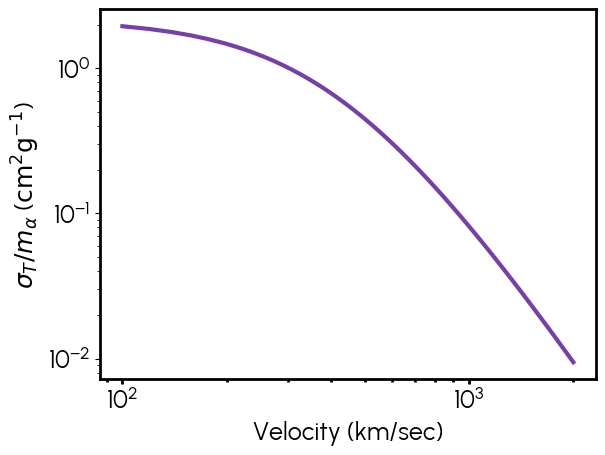

In [2]:
"""
Here we compute and plot the momentum transfer cross section as a function of velocity. 
"""

def CrossSection(v_rel):
    v_rel = v_rel/299792.458 #Converts from units of km/sec to units of c
    v_cm = v_rel/2 #Center of mass frame, good approximation for v << c
    #v_rel is the relative velocity, v_cm is in the center-of-mass frame.

    #Parameters (these can be changed)
    m_alpha = 1  #Heavy vector mass in GeV 
    m_h = 0.001   #MeV mediator mass (in units of GeV)
    g = 0.0175 #Coupling constant 
    p = m_alpha*v_cm/np.sqrt(1-v_cm*v_cm) #Relativistic momentum 
    E_cm = 2*np.sqrt((p*p + m_alpha*m_alpha)) #Total center of mass energy, head-on collision 

    #Define functions for C1, C2, C3
    def C1(theta):
        return 0.25*(E_cm**2) - p*p*np.cos(theta)

    def C2(theta):
        return 0.25*(E_cm**2) + p*p*np.cos(theta)

    def C3(theta):
        return 0.25*(E_cm**2) + p*p

    #Squared amplitude |M|^2
    def M2(theta):
        numer1 = 4*(m_alpha**4)*((C1(theta))**2 + (C2(theta))**2 + (C3(theta)**2))
        numer2 = 2*((C1(theta))**2)*((C2(theta))**2)
        numer3 = -8*C1(theta)*C2(theta)*C3(theta)*(m_alpha**2) 
        denom1 = (m_h**2 + 2*p*p)**2 - 4*(p**4)*((np.cos(theta))**2)

        term1 = (numer1 + numer2 + numer3)/denom1

        denom2 = (m_h**2 - 2*p*p*np.cos(theta) + 2*p*p)**2
        denom3 = (m_h**2 + 2*p*p*np.cos(theta) + 2*p*p)**2

        term2 = (((C1(theta))**2 + 2*(m_alpha**4))**2)/denom2
        term3 = (((C2(theta))**2 + 2*(m_alpha**4))**2)/denom3
        return 8*((g**4)/(9*(m_alpha**8)))*(term1 + term2 + term3)

    #Differential cross section 
    def dsigma_dOmega(theta):
        return 0.389*M2(theta)/(64*np.pi*np.pi*E_cm*E_cm) #The 0.389 is a unit conversion factor. 
    
    #Here we numerically integrate to obtain the momentum transfer cross section 
    thetas = np.linspace(0, np.pi, 1000)
    dtheta = thetas[1] - thetas[0]
    MomentumTransferCrossSect = 0
    for theta in thetas:
        MomentumTransferCrossSect = MomentumTransferCrossSect + dsigma_dOmega(theta)*dtheta*2*np.pi*2*(1-np.fabs(np.cos(theta)))*np.sin(theta)
     
    #GeV/c^2 = 1.78266192×10−24 grams 
    sqr_cm_per_mb = 1.0e-27 
    return sqr_cm_per_mb*MomentumTransferCrossSect/(m_alpha*1.78266192*(10**(-24))) #Converts mb to cm^2 / gram 
    #This yields the momentum transfer cross section per unit mass, in sq cm / gram

print('Momentum Transfer Cross Section at a Relative velcity of 200 km/sec: ')                    
print(CrossSection(200))
print('Momentum Transfer Cross Section at a Relative velcity of 1000 km/sec: ')    
print(CrossSection(1000))

#Here we compute the momentum transfer cross section as a function of velocity, and append the values to a list. 
Cross_Sect_List = []
Veloc_List = np.linspace(100, 2000, 100)
for v in Veloc_List:
    Cross_Sect_List.append(CrossSection(v))

#Plotting the momentum transfer cross section
plt.plot(Veloc_List, Cross_Sect_List, linewidth = 3, color = cmap(1))
plt.ylabel((r'$\sigma_T / m_{\alpha}$ ($\rm{cm}^2 \rm{g}^{-1}$)'))
plt.xlabel('Velocity (km/sec)')
plt.xscale('log')
plt.yscale('log')
#plt.savefig('Momentum_Transfer_Cross_Section_Plot.png')